# REGCP1: Renewable generator model with PLL support

In [1]:
import andes

## Comparing `REGCA1` with `REGCP1` with a low-latency PLL

In [2]:
ss_std = andes.run(andes.get_case("ieee14/ieee14_solar.xlsx"), verbose=30)

ss_std.TDS.config.tf = 5
ss_std.TDS.run()

-> Single process finished in 0.4668 seconds.


  0%|          | 0/100 [00:00<?, ?%/s]

<Toggle Toggle_1>: Line.Line_1 status changed to 0 at t=1.0 sec.
<Toggle Toggle_2>: Line.Line_1 status changed to 1 at t=1.1 sec.


True

In [3]:
ss_pll = andes.run(andes.get_case("ieee14/ieee14_regcp1.xlsx"), 
               verbose=30,
               no_output=True,)

ss_pll.TDS.config.tf = 5
xy = ss_pll.TDS.run()

-> Single process finished in 0.1744 seconds.


  0%|          | 0/100 [00:00<?, ?%/s]

<Toggle Toggle_1>: Line.Line_1 status changed to 0 at t=1.0 sec.
<Toggle Toggle_2>: Line.Line_1 status changed to 1 at t=1.1 sec.


### PLL angle tracking performance

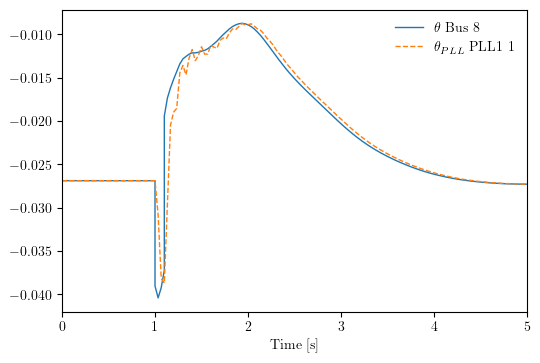

(<Figure size 600x400 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [4]:
ss_pll.TDS.plt.plot([ss_pll.PLL1.a, ss_pll.PLL1.am])

### Comparing power outputs

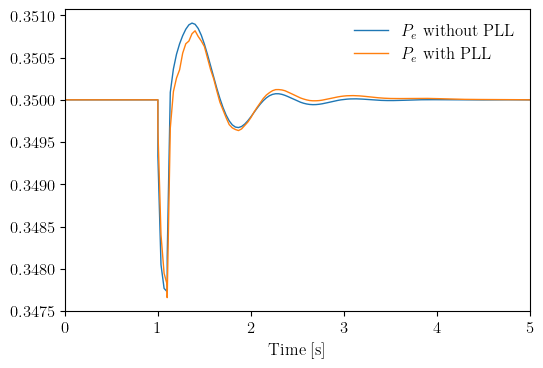

(<Figure size 600x400 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [5]:
fig, ax = ss_std.TDS.plt.plot([ss_std.REGCA1.Pe], right=5,
                              show=False, yheader=['$P_e$ without PLL'])

ss_pll.TDS.plt.plot(ss_pll.REGCP1.Pe, yheader=['$P_e$ with PLL'],
                    right=5, fig=fig, ax=ax,
                    autoscale=True)

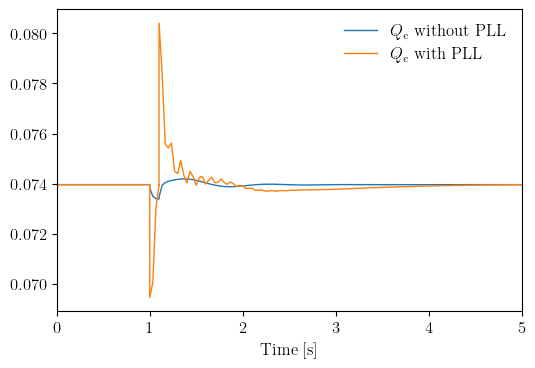

In [6]:
fig, ax = ss_std.TDS.plt.plot([ss_std.REGCA1.Qe], right=5,
                              show=False, yheader=['$Q_e$ without PLL'])

fig, ax = ss_pll.TDS.plt.plot(ss_pll.REGCP1.Qe, yheader=['$Q_e$ with PLL'],
                    right=5, fig=fig, ax=ax,
                    autoscale=True)

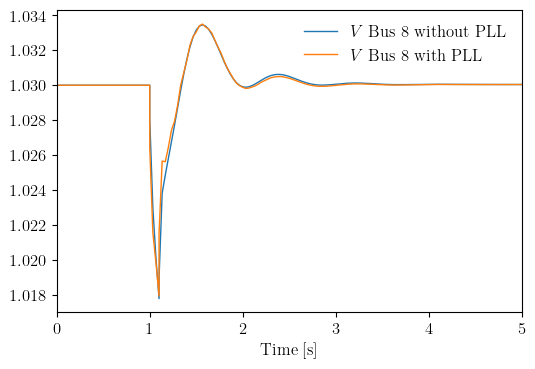

In [7]:
fig, ax = ss_std.TDS.plt.plot([ss_std.REGCA1.v], right=5,
                              show=False, yheader=['$V$ Bus 8 without PLL'])

fig, ax = ss_pll.TDS.plt.plot(ss_pll.REGCP1.v, yheader=['$V$ Bus 8 with PLL'],
                    right=5, fig=fig, ax=ax,
                    autoscale=True)

## Comparing `REGCA1` with `REGCP1` with a high-latency PLL

In [8]:
ss_pll = andes.run(andes.get_case("ieee14/ieee14_regcp1.xlsx"), verbose=30)

ss_pll.PLL1.alter("Tf", "PLL1_1", 0.5)
ss_pll.PLL1.alter("Tp", "PLL1_1", 0.5)

ss_pll.TDS.config.tf = 5
xy = ss_pll.TDS.run()

-> Single process finished in 0.1391 seconds.


  0%|          | 0/100 [00:00<?, ?%/s]

<Toggle Toggle_1>: Line.Line_1 status changed to 0 at t=1.0 sec.
<Toggle Toggle_2>: Line.Line_1 status changed to 1 at t=1.1 sec.


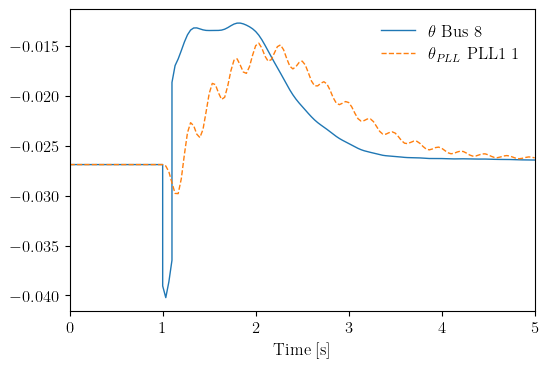

(<Figure size 600x400 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [9]:
ss_pll.TDS.plt.plot([ss_pll.PLL1.a, ss_pll.PLL1.am])

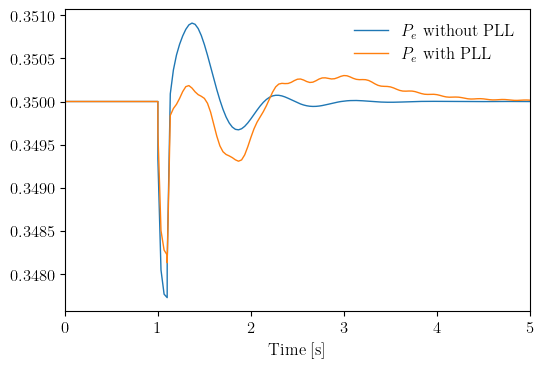

In [10]:
fig, ax = ss_std.TDS.plt.plot([ss_std.REGCA1.Pe], right=5,
                              show=False, yheader=['$P_e$ without PLL'])

fig, ax = ss_pll.TDS.plt.plot(ss_pll.REGCP1.Pe, yheader=['$P_e$ with PLL'],
                    right=5, fig=fig, ax=ax,
                    autoscale=True)

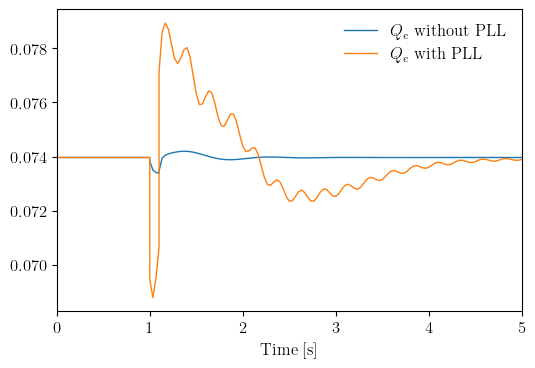

In [11]:
fig, ax = ss_std.TDS.plt.plot([ss_std.REGCA1.Qe], right=5,
                              show=False, yheader=['$Q_e$ without PLL'])

fig, ax = ss_pll.TDS.plt.plot(ss_pll.REGCP1.Qe, yheader=['$Q_e$ with PLL'],
                    right=5, fig=fig, ax=ax,
                    autoscale=True)

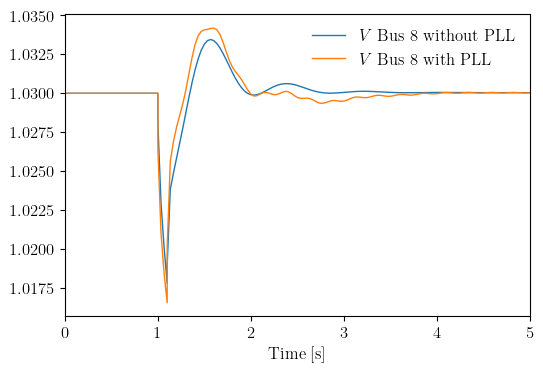

In [12]:
fig, ax = ss_std.TDS.plt.plot([ss_std.REGCA1.v], right=5,
                              show=False, yheader=['$V$ Bus 8 without PLL'])

fig, ax = ss_pll.TDS.plt.plot(ss_pll.REGCP1.v, yheader=['$V$ Bus 8 with PLL'],
                    right=5, fig=fig, ax=ax,
                    autoscale=True)